In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
DF = pd.read_csv('fooddataset.csv')

In [3]:
DF

,Dates,Day,Priyanshu,Srushti,Manthan
0,1,Monday,Vada Pav,Vada Pav,Vada Pav
1,2,Tuesday,Pizza,Pizza,Pizza
2,3,Wednesday,Burger,Burger,Dhokla
3,4,Thursday,Pasta,Pasta,Dhokla
4,5,Friday,Pani Puri,Samosa,Samosa
5,6,Saturday,Bread Pakoda,Bread Pakoda,Bread Pakoda
6,7,Sunday,Chole Bhature,Vada Pav,Vada Pav
7,8,Monday,Butter Chicken,Butter Chicken,Butter Chicken
8,9,Tuesday,Pani Puri,Pani Puri,Dhokla
9,10,Wednesday,Dhokla,Dhokla,Dhokla


In [4]:
DF.describe()

,Dates
count,30.000000
mean,15.500000
std,8.803408
min,1.000000
25%,8.250000
50%,15.500000
75%,22.750000
max,30.000000


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dates      30 non-null     int64 
 1   Day        30 non-null     object
 2   Priyanshu  30 non-null     object
 3   Srushti    30 non-null     object
 4   Manthan    30 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['Day', 'Priyanshu', 'Srushti','Manthan']
encoder=LabelEncoder()
ls_encoded = []
for ftr in ftr_list:
  DF[ftr] = encoder.fit_transform(DF[ftr])
  ls_encoded.append(encoder.classes_)
DF

,Dates,Day,Priyanshu,Srushti,Manthan
0,1,1,16,15,15
1,2,5,13,13,12
2,3,6,2,3,6
3,4,4,12,12,6
4,5,0,11,14,14
5,6,2,1,2,1
6,7,3,4,15,15
7,8,1,3,4,2
8,9,5,11,11,6
9,10,6,5,7,6


<AxesSubplot:xlabel='Day', ylabel='Density'>

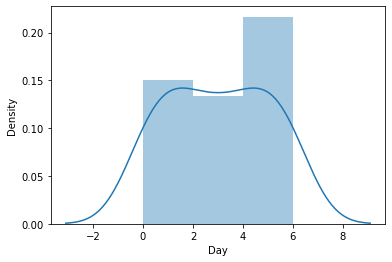

In [7]:
sns.distplot(DF['Day'])

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(DF, test_size=0.2, random_state=5)
print(train_df.shape)
print(test_df.shape)

(24, 5)
(6, 5)


In [9]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_score(model, data, predictor, target) :
  model.fit(data[predictor], data[target])
  predictions = model.predict(data[predictor])
  accuracy = accuracy_score(predictions, data[target])
  print('Accuracy: %s' % '{0:.2}' .format(accuracy) )
  scores = cross_val_score(model, data[predictor], data[target],
                           scoring="neg_mean_squared_error", cv= 5)
  print('Cross-Validation Score: {}'.format(np.sqrt(-scores)))
  print(f'Avarage RMSE: {np.sqrt(-scores).mean()}')

In [10]:
days = list(ls_encoded[0])
day_num = [i for i in range(7)]

day_dict = {}
day_dict.update(zip(days, day_num))
day_dict

{'Friday': 0,
 'Monday': 1,
 'Saturday': 2,
 'Sunday': 3,
 'Thursday': 4,
 'Tuesday': 5,
 'Wednesday': 6}

In [27]:
#def Srushti():
target_var = ['Day']
predictor_var = ['Srushti']
    # predictor_var = ['Priyanshu']
model = RandomForestClassifier(n_estimators=100)
print_model_score(model, train_df, predictor_var, target_var)
days = list(ls_encoded[0])
day_num = [i for i in range(7)]

day_dict = {}
day_dict.update(zip(days, day_num))
day_dict
def pred(model):
    day_num = input("Enter the Day: ")
    day_num = day_dict[day_num]
    inp = [[int(day_num)]]
    inp = np.array(inp).reshape(1, -1)
    item = model.predict(inp)[0]
    
    return ls_encoded[2][item]
pred(model)

Accuracy: 0.67
Cross-Validation Score: [2.89827535 2.14476106 2.7202941  3.         3.04138127]
Avarage RMSE: 2.7609423550173613
Enter the Day: Monday


'Butter Chicken'

In [33]:
#def Priyanshu():
target_var = ['Day']
predictor_var = ['Priyanshu']
model = RandomForestClassifier(n_estimators=100)
print_model_score(model, train_df, predictor_var, target_var)
days = list(ls_encoded[0])
day_num = [i for i in range(7)]

day_dict = {}
day_dict.update(zip(days, day_num))
day_dict
def pred(model):
    day_num = input("Enter the Day: ")
    day_num = day_dict[day_num]
    inp = [[int(day_num)]]
    inp = np.array(inp).reshape(1, -1)
    item = model.predict(inp)[0]
    
#     return item
    return ls_encoded[1][item]
pred(model)

Accuracy: 0.67
Cross-Validation Score: [3.13049517 2.75680975 1.8973666  2.48997992 1.22474487]
Avarage RMSE: 2.2998792612016223
Enter the Day: Sunday


'Bread Pakoda'

In [36]:
#def Manthan():
target_var = ['Day']
predictor_var = ['Manthan']
model = RandomForestClassifier(n_estimators=100)
print_model_score(model, train_df, predictor_var, target_var)
days = list(ls_encoded[0])
day_num = [i for i in range(7)]

day_dict = {}
day_dict.update(zip(days, day_num))
day_dict
def pred(model):
    day_num = input("Enter the Day: ")
    day_num = day_dict[day_num]
    inp = [[int(day_num)]]
    inp = np.array(inp).reshape(1, -1)
    item = model.predict(inp)[0]
    
#     return item
    return ls_encoded[3][item]
pred(model)

Accuracy: 0.71
Cross-Validation Score: [2.60768096 0.89442719 2.0976177  2.14476106 2.78388218]
Avarage RMSE: 2.1056738179578023
Enter the Day: Wednesday


'Dhokla'